# Fig 2(a) violin plot

成功使用 UTF-8 编码读取文件
数据框的列名： ['City', 'avg_PV_matching_level', 'charging_station_count', 'avg_PV_value', 'Area', 'avg_wind_matching_level', 'avg_power_density']


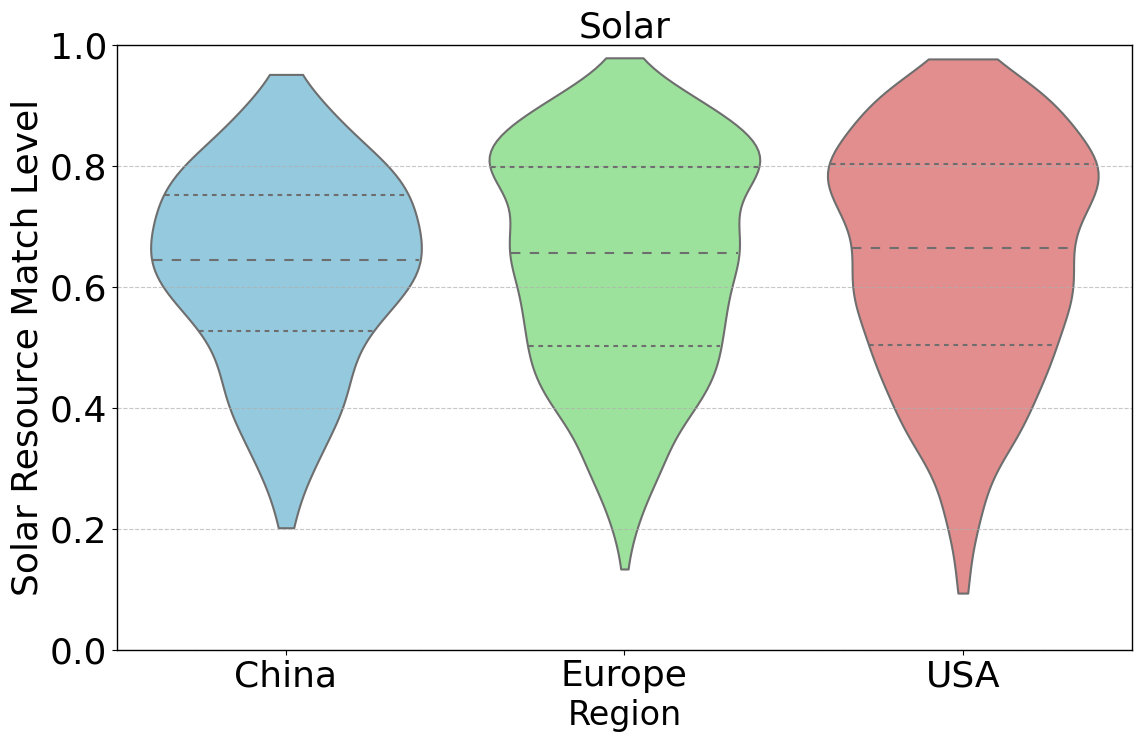


Region: China
Minimum: 0.2018
First Quartile (Q1): 0.5274
Median (Q2): 0.6452
Third Quartile (Q3): 0.7525
Maximum: 0.9519

Region: Europe
Minimum: 0.1336
First Quartile (Q1): 0.5020
Median (Q2): 0.6571
Third Quartile (Q3): 0.7991
Maximum: 0.9794

Region: USA
Minimum: 0.0937
First Quartile (Q1): 0.5038
Median (Q2): 0.6644
Third Quartile (Q3): 0.8044
Maximum: 0.9775


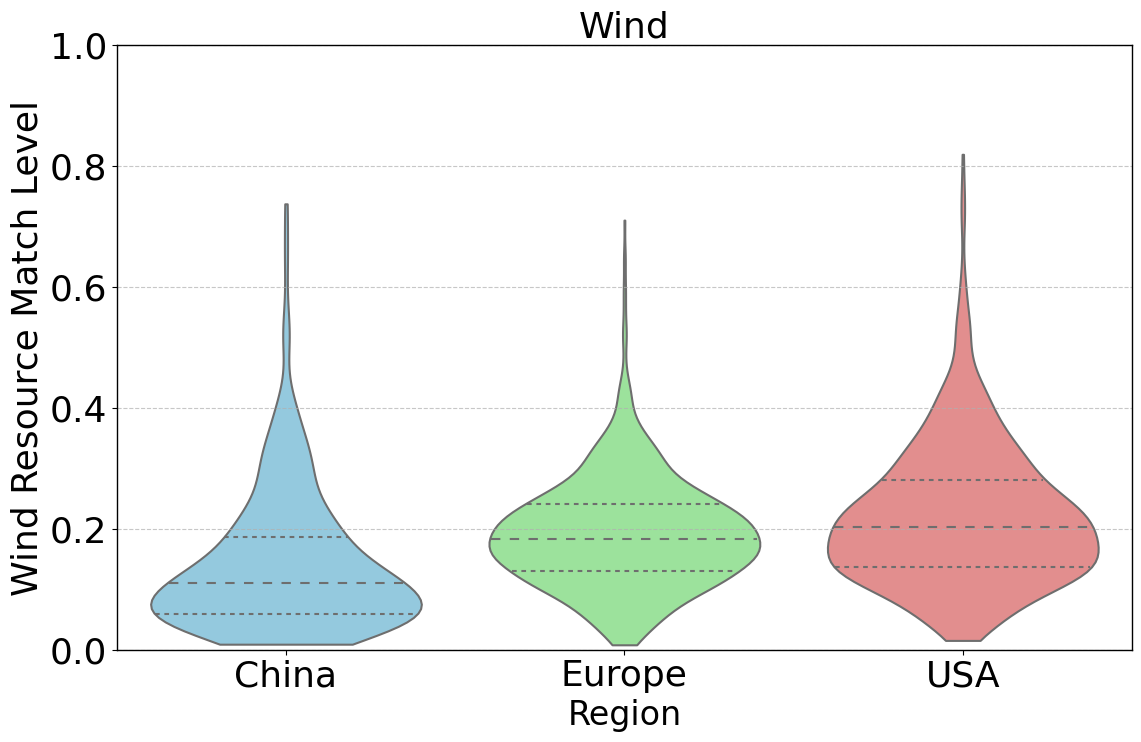


Region: China
Minimum: 0.0092
First Quartile (Q1): 0.0596
Median (Q2): 0.1098
Third Quartile (Q3): 0.1862
Maximum: 0.7378

Region: Europe
Minimum: 0.0081
First Quartile (Q1): 0.1310
Median (Q2): 0.1834
Third Quartile (Q3): 0.2406
Maximum: 0.7108

Region: USA
Minimum: 0.0154
First Quartile (Q1): 0.1367
Median (Q2): 0.2025
Third Quartile (Q3): 0.2806
Maximum: 0.8197


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read CSV file with UTF-8 encoding (utf-8-sig to handle BOM if present)
def read_csv_utf8(file_path):
    try:
        df = pd.read_csv(file_path, encoding='utf-8-sig')
        print("Successfully read file using UTF-8 encoding")
        return df
    except UnicodeDecodeError:
        raise Exception("Failed to read file with UTF-8 encoding")

# Print descriptive statistics (quartiles) for violin plots
def print_violin_statistics(df, group_col, value_col):
    grouped = df.groupby(group_col)[value_col]
    for name, group in grouped:
        stats = group.describe()[['min', '25%', '50%', '75%', 'max']]
        region_name = 'Europe' if name == 'EU' else name  # Display EU as Europe
        print(f"\nRegion: {region_name}")
        print(f"Minimum: {stats['min']:.4f}")
        print(f"First Quartile (Q1): {stats['25%']:.4f}")
        print(f"Median (Q2): {stats['50%']:.4f}")
        print(f"Third Quartile (Q3): {stats['75%']:.4f}")
        print(f"Maximum: {stats['max']:.4f}")

# Create a fixed color palette; map EU to Europe color
def create_fixed_palette():
    color_map = {
        "China": "skyblue",
        "Europe": "lightgreen",  # Used for display; EU will be replaced to Europe
        "USA": "lightcoral"
    }
    return color_map

# Set spine (border) properties for the plot axes
def set_spine_properties(ax):
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1)

# Main execution function
def main():
    # Define input file path
    csv_file = 'combined_city_PV_wind_matching_level_with_area22.csv'

    # Read the CSV file
    df = read_csv_utf8(csv_file)

    # Print column names to verify required columns are present
    print("DataFrame columns:", df.columns.tolist())

    # Update global font size for plots
    plt.rcParams.update({'font.size': 26})

    # Create fixed color palette
    color_map = create_fixed_palette()

    # Make a copy and replace 'EU' with 'Europe' for plotting purposes
    plot_df = df.copy()
    plot_df['Area'] = plot_df['Area'].replace({'EU': 'Europe'})

    # Plot solar (PV) matching level violin plot with embedded quartiles
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.violinplot(
        x='Area',
        y='avg_PV_matching_level',
        data=plot_df,
        palette=color_map,
        inner='quartile',      # Show quartiles inside the violin
        ax=ax,
        cut=0,                 # Prevent density estimation from extending beyond data limits
        scale='width'          # Make all violins equally wide
    )

    # Set title and axis labels
    ax.set_title('Solar', fontsize=26)
    ax.set_xlabel('Region', fontsize=24)
    ax.set_ylabel('Solar Resource Match Level', fontsize=26)

    # Add horizontal grid lines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Set y-axis limits to [0, 1] to match the matching level range
    ax.set_ylim(0, 1)

    # Keep x-axis labels horizontal
    plt.xticks(rotation=0, ha='center')

    # Customize the border (spines) of the plot
    set_spine_properties(ax)

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

    # Print descriptive statistics for PV matching levels
    print_violin_statistics(df, 'Area', 'avg_PV_matching_level')

    # Plot wind matching level violin plot with embedded quartiles
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.violinplot(
        x='Area',
        y='avg_wind_matching_level',
        data=plot_df,
        palette=color_map,
        inner='quartile',      # Show quartiles inside the violin
        ax=ax,
        cut=0,                 # Prevent density estimation from extending beyond data limits
        scale='width'          # Make all violins equally wide
    )

    # Set title and axis labels
    ax.set_title('Wind', fontsize=26)
    ax.set_xlabel('Region', fontsize=24)
    ax.set_ylabel('Wind Resource Match Level', fontsize=26)

    # Add horizontal grid lines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Set y-axis limits to [0, 1] to match the matching level range
    ax.set_ylim(0, 1)

    # Keep x-axis labels horizontal
    plt.xticks(rotation=0, ha='center')

    # Customize the border (spines) of the plot
    set_spine_properties(ax)

    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

    # Print descriptive statistics for wind matching levels
    print_violin_statistics(df, 'Area', 'avg_wind_matching_level')

# Execute main function if script is run directly
if __name__ == "__main__":
    main()





# Cluster analysis was conducted on the potential and adaptability indicators of wind and solar power generation

Analyzing USA
Finding optimal number of clusters for Wind Energy in USA:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

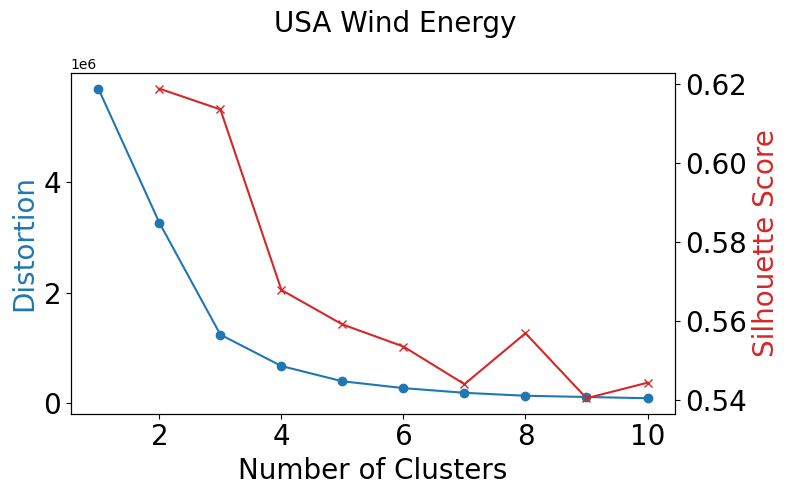

The optimal number of clusters for Wind Energy in USA is: 2

Finding optimal number of clusters for Wind Matching Level in USA:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

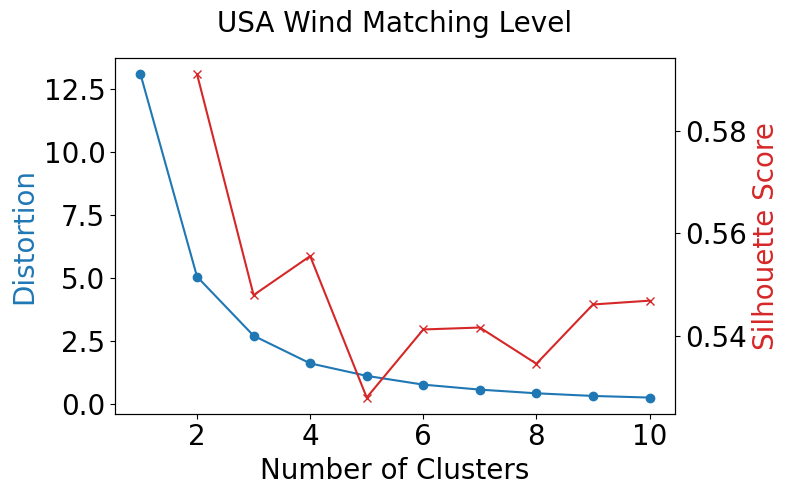

The optimal number of clusters for Wind Matching Level in USA is: 2

Finding optimal number of clusters for Solar Energy in USA:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

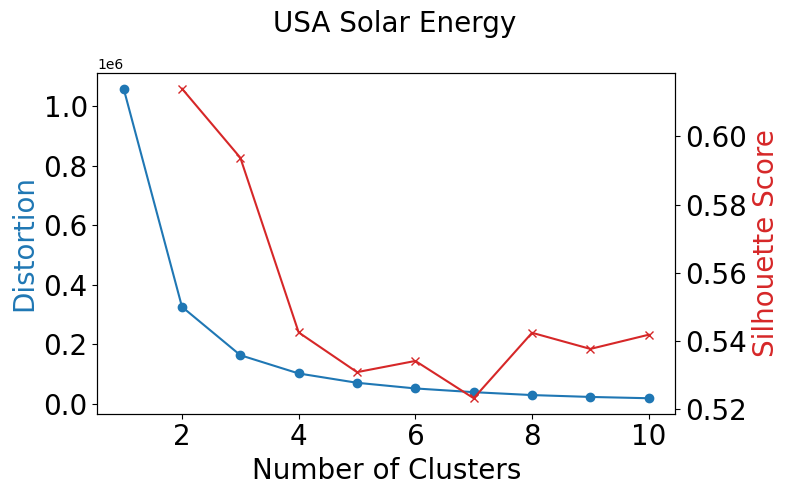

The optimal number of clusters for Solar Energy in USA is: 2

Finding optimal number of clusters for Solar Matching Level in USA:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

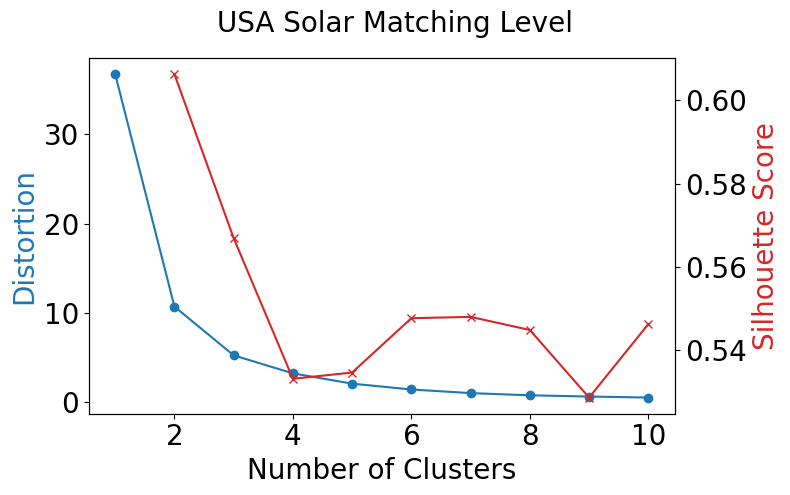

The optimal number of clusters for Solar Matching Level in USA is: 2

Analyzing Europe
Finding optimal number of clusters for Wind Energy in Europe:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


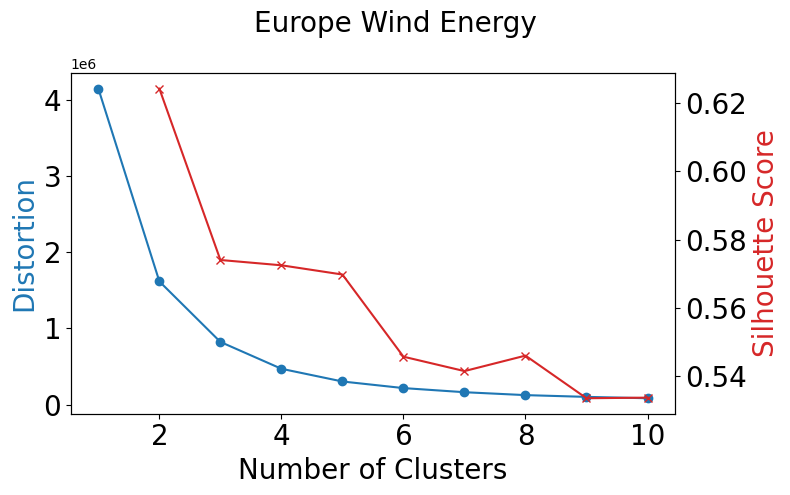

The optimal number of clusters for Wind Energy in Europe is: 2

Finding optimal number of clusters for Wind Matching Level in Europe:


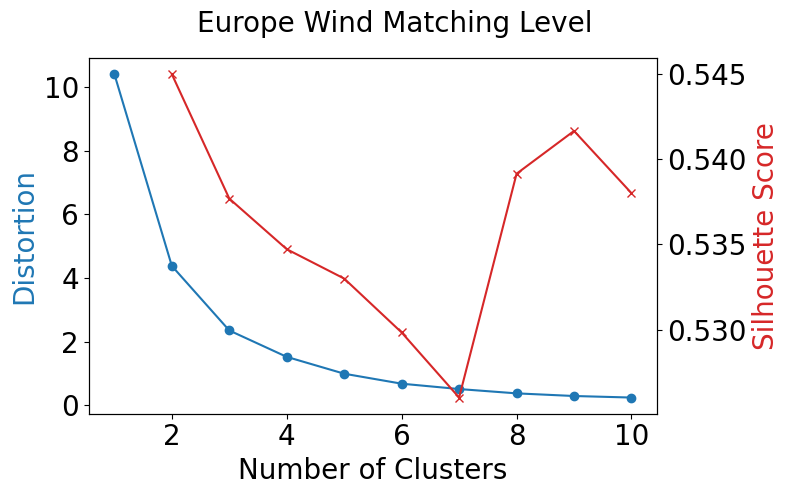

The optimal number of clusters for Wind Matching Level in Europe is: 2

Finding optimal number of clusters for Solar Energy in Europe:


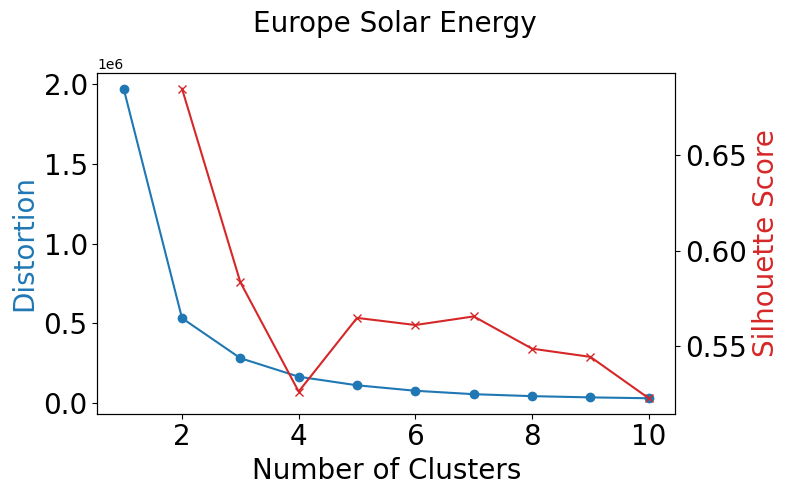

The optimal number of clusters for Solar Energy in Europe is: 2

Finding optimal number of clusters for Solar Matching Level in Europe:


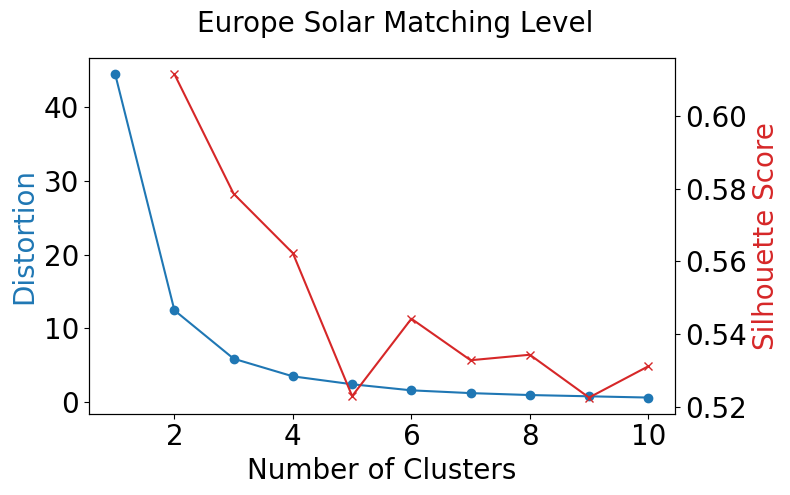

The optimal number of clusters for Solar Matching Level in Europe is: 2

Analyzing China
Finding optimal number of clusters for Wind Energy in China:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

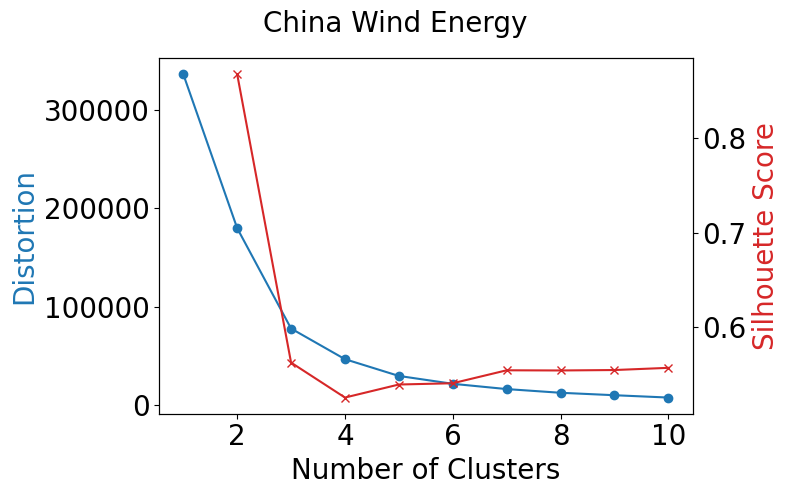

The optimal number of clusters for Wind Energy in China is: 2

Finding optimal number of clusters for Wind Matching Level in China:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

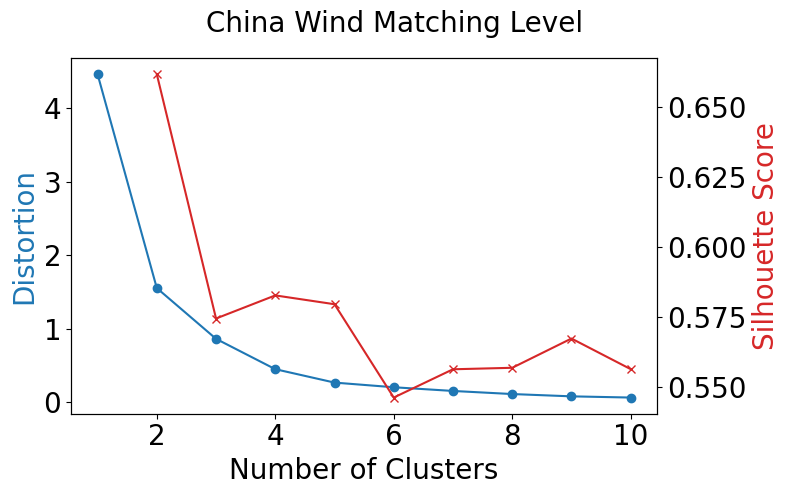

The optimal number of clusters for Wind Matching Level in China is: 2

Finding optimal number of clusters for Solar Energy in China:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

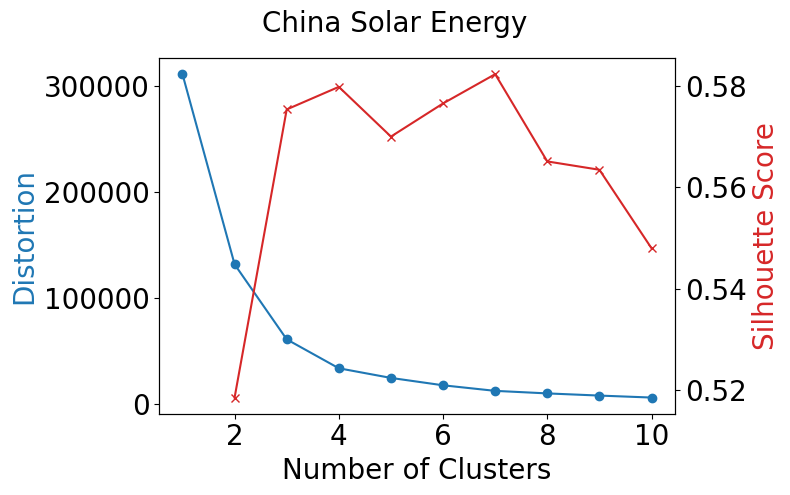

The optimal number of clusters for Solar Energy in China is: 7

Finding optimal number of clusters for Solar Matching Level in China:


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

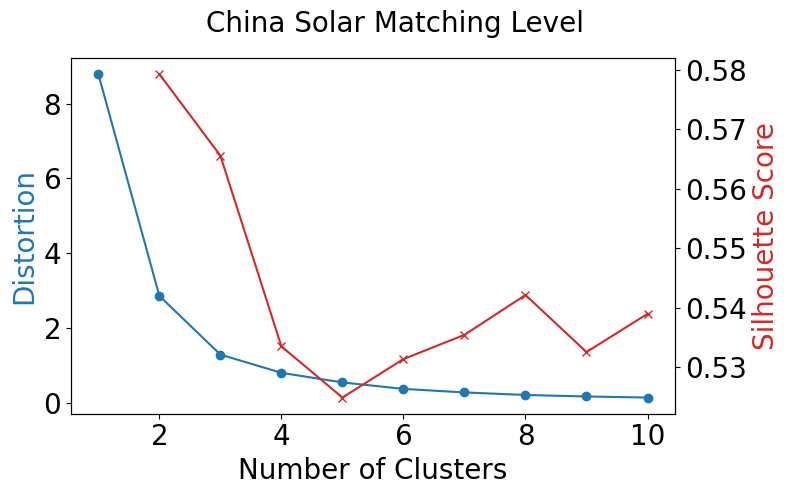

The optimal number of clusters for Solar Matching Level in China is: 2



C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('combineddata_windsolarenergy_and_matchinglevel.csv')  # Replace with your actual file path

# Define the variables to analyze and their display names
variables = {
    'Avg_Wind_Energy': 'Wind Energy',
    'avg_wind_matching_level': 'Wind Matching Level',
    'Avg_PV_Energy': 'Solar Energy',
    'avg_PV_matching_level': 'Solar Matching Level'
}

def plot_elbow_and_silhouette(data, max_k, region, var_name_display):
    """
    Plot the elbow method (distortion) and silhouette scores for different numbers of clusters.
    Returns the optimal number of clusters based on the highest silhouette score.
    """
    distortions = []
    silhouette_scores = []

    # Compute distortions for k from 1 to max_k
    for k in range(1, max_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
        km.fit(data.values.reshape(-1, 1))  # Reshape to column vector
        distortions.append(km.inertia_)

    # Compute silhouette scores for k from 2 to max_k
    for k in range(2, max_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=0)
        labels = km.fit_predict(data.values.reshape(-1, 1))
        silhouette_avg = silhouette_score(data.values.reshape(-1, 1), labels)
        silhouette_scores.append(silhouette_avg)

    # Plot elbow and silhouette on shared x-axis
    fig, ax1 = plt.subplots(figsize=(8, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Number of Clusters', fontsize=20)
    ax1.set_ylabel('Distortion', color=color, fontsize=20)
    ax1.plot(range(1, max_k + 1), distortions, marker='o', color=color)
    ax1.tick_params(axis='y', labelsize=20)  # Y-axis tick label size
    ax1.tick_params(axis='x', labelsize=20)  # X-axis tick label size

    ax2 = ax1.twinx()  # Second y-axis sharing the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Silhouette Score', color=color, fontsize=20)
    ax2.plot(range(2, max_k + 1), silhouette_scores, marker='x', color=color)
    ax2.tick_params(axis='y', labelsize=20)  # Second Y-axis tick label size

    # Set title including region and variable name
    title = f"{region} {var_name_display}"
    fig.suptitle(title, fontsize=20)

    fig.tight_layout()
    plt.show()

    # Determine the best k based on maximum silhouette score
    if len(silhouette_scores) > 0:
        best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # k starts from 2
    else:
        best_k = 2  # Default fallback
    return best_k

# Map area codes to full region names
areas_map = {
    'USA': 'USA',
    'EU': 'Europe',
    'China': 'China'
}

# Create a new DataFrame to store results
result_df = df.copy()

# Analyze each region and each variable
for area_code, region in areas_map.items():
    print(f"Analyzing {region}")
    for var_name, var_display in variables.items():
        subset = df[df['Area'] == area_code][var_name]

        # Handle missing values: fill with mean (other strategies could be used)
        subset = subset.fillna(subset.mean())

        if len(subset) < 2:  # Need at least 2 data points for clustering
            print(f"Not enough data points for {var_display} in {region}.")
            continue

        print(f"Finding optimal number of clusters for {var_display} in {region}:")
        best_k = plot_elbow_and_silhouette(subset, max_k=10, region=region, var_name_display=var_display)
        print(f"The optimal number of clusters for {var_display} in {region} is: {best_k}\n")

        # Perform final clustering with the best k
        km = KMeans(n_clusters=best_k, init='k-means++', n_init=10, max_iter=300, random_state=0)
        labels = km.fit_predict(subset.values.reshape(-1, 1))

        # Add numeric cluster labels to the result DataFrame
        cluster_col = f'{var_name}_cluster'
        result_df.loc[df['Area'] == area_code, cluster_col] = labels

        # Label each cluster as "High" or "Low" based on cluster center values
        cluster_centers = km.cluster_centers_.flatten()
        overall_mean = np.mean(cluster_centers)
        high_low_labels = ['High' if center > overall_mean else 'Low' for center in cluster_centers]

        # Map numeric labels to "High"/"Low" and add to DataFrame
        label_col = f'{var_name}_label'
        result_df.loc[df['Area'] == area_code, label_col] = [high_low_labels[label] for label in labels]

# Optional: Save the final clustered results
# result_df.to_csv('clustered_results_with_labels.csv', index=False)



In [53]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data
df = pd.read_csv('combineddata_windsolarenergy_and_matchinglevel.csv')  # Source: Calculation of matching level

# Define the variables to analyze
variables = ['Avg_Wind_Energy', 'avg_wind_matching_level', 'Avg_PV_Energy', 'avg_PV_matching_level']

# List of high-value cities to exclude (only for China's Avg_Wind_Energy)
high_value_cities_to_ignore = {
    'China': {
        'Avg_Wind_Energy': ['北屯市', '吐鲁番市', '海南藏族自治州', '阿勒泰地区']
    }
}

# Create a new DataFrame to store results
result_df = df.copy()

# Iterate over each unique area
for area in df['Area'].unique():
    print(f"Analyzing {area}")
    for var in variables:
        # Extract subset with variable and city name for the current area
        subset = df[df['Area'] == area][[var, 'City']].copy()

        # Handle missing values: fill with mean (other methods like dropping could be used)
        subset[var] = subset[var].fillna(subset[var].mean())

        if len(subset) < 2:  # Ensure sufficient data points for clustering
            print(f"Not enough data points for {var} in {area}.")
            continue

        # Special handling for China's Avg_Wind_Energy: exclude high-value outlier cities
        if area == 'China' and var == 'Avg_Wind_Energy':
            high_value_cities = high_value_cities_to_ignore[area][var]
            remaining_subset = subset[~subset['City'].isin(high_value_cities)]

            if len(remaining_subset) < 2:
                print(f"Not enough data points for {var} in {area} after removing high-value cities.")
                continue

            # Perform KMeans clustering (2 clusters) on the remaining cities
            km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
            labels = km.fit_predict(remaining_subset[[var]].values.reshape(-1, 1))

            # Label clusters as "High" or "Low" based on cluster center values
            cluster_centers = km.cluster_centers_.flatten()
            overall_mean = np.mean(cluster_centers)
            high_low_labels = ['High' if center > overall_mean else 'Low' for center in cluster_centers]

            # Create result DataFrame for remaining cities
            remaining_city_names = remaining_subset['City']
            remaining_result_df = pd.DataFrame({
                'City': remaining_city_names,
                f'{var}_cluster': labels,
                f'{var}_label': [high_low_labels[label] for label in labels],
                f'{var}_value': remaining_subset[var].values  # Use .values for alignment
            })

            # Assign high-value outlier cities to a special "High" group (cluster 2)
            high_value_city_names = subset[subset['City'].isin(high_value_cities)]['City']
            high_value_result_df = pd.DataFrame({
                'City': high_value_city_names,
                f'{var}_cluster': [2] * len(high_value_city_names),  # Use cluster 2 to distinguish
                f'{var}_label': ['High'] * len(high_value_city_names),
                f'{var}_value': subset[subset['City'].isin(high_value_cities)][var].values
            })

            # Combine results from normal and high-value cities
            combined_result_df = pd.concat([remaining_result_df, high_value_result_df], ignore_index=True)

            # Reset the result columns for this area and variable
            result_df.loc[result_df['Area'] == area, f'{var}_cluster'] = None
            result_df.loc[result_df['Area'] == area, f'{var}_label'] = None
            result_df.loc[result_df['Area'] == area, f'{var}_value'] = None

            # Merge classification results back into the main DataFrame
            for _, row in combined_result_df.iterrows():
                city = row['City']
                cluster = row[f'{var}_cluster']
                label = row[f'{var}_label']
                value = row[f'{var}_value']

                mask = (result_df['Area'] == area) & (result_df['City'] == city)
                result_df.loc[mask, f'{var}_cluster'] = cluster
                result_df.loc[mask, f'{var}_label'] = label
                result_df.loc[mask, f'{var}_value'] = value

        else:
            # Standard KMeans clustering for all other cases
            km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
            labels = km.fit_predict(subset[[var]].values.reshape(-1, 1))

            # Label clusters as "High" or "Low" based on center values
            cluster_centers = km.cluster_centers_.flatten()
            overall_mean = np.mean(cluster_centers)
            high_low_labels = ['High' if center > overall_mean else 'Low' for center in cluster_centers]

            # Create temporary DataFrame for results
            temp_df = pd.DataFrame({
                'City': subset['City'],
                f'{var}_cluster': labels,
                f'{var}_label': [high_low_labels[label] for label in labels],
                f'{var}_value': subset[var].values
            })

            # Reset the result columns for this area and variable
            result_df.loc[result_df['Area'] == area, f'{var}_cluster'] = None
            result_df.loc[result_df['Area'] == area, f'{var}_label'] = None
            result_df.loc[result_df['Area'] == area, f'{var}_value'] = None

            # Merge classification results back into the main DataFrame
            for _, row in temp_df.iterrows():
                city = row['City']
                cluster = row[f'{var}_cluster']
                label = row[f'{var}_label']
                value = row[f'{var}_value']

                mask = (result_df['Area'] == area) & (result_df['City'] == city)
                result_df.loc[mask, f'{var}_cluster'] = cluster
                result_df.loc[mask, f'{var}_label'] = label
                result_df.loc[mask, f'{var}_value'] = value

# Save the final results to a CSV file
result_df.to_csv('Clustered_results_adjusted.csv', index=False)
print("Results saved to 'Clustered_results_adjusted.csv'")

Analyzing EU
Analyzing China


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Analyzing USA


C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ZF\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Results saved to 'clustered_results_adjusted.csv'


# Figure 2b

# The proportion of larger cities with the maximum and minimum differences of photovoltaic power has increased

C:\Windows\Temp\ipykernel_4384\2799480602.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Combination'] = subset[labels[0]] + '-' + subset[labels[1]]
C:\Windows\Temp\ipykernel_4384\2799480602.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Combination'] = subset[labels[0]] + '-' + subset[labels[1]]
C:\Windows\Temp\ipykernel_4384\2799480602.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

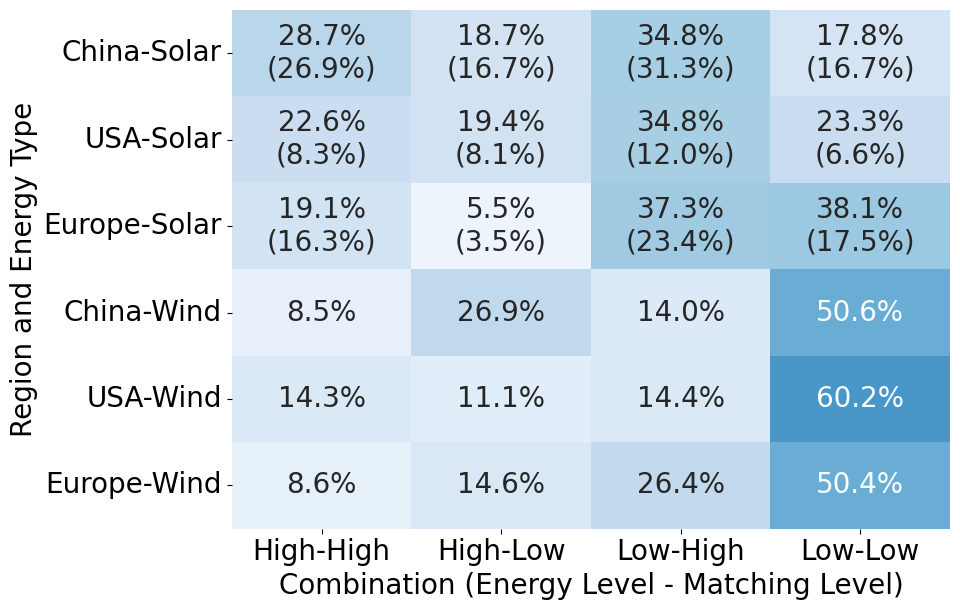

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the main clustered data
df = pd.read_csv('clustered_results_adjusted.csv')

# Load the PV profit ratio data
profit_df = pd.read_csv('PV_Profit_Ratio_less_than_0_05_updated.csv')

# Get the list of cities with PV profit ratio < 0.05
low_profit_cities = set(profit_df['City'])

# Calculate the list of cities with PV profit ratio >= 0.05 by subtracting from all cities in df
all_cities_set = set(df['City'])
high_profit_cities = all_cities_set - low_profit_cities

# Define the energy labels
energy_labels = {
    'Wind': ['Avg_Wind_Energy_label', 'avg_wind_matching_level_label'],
    'Solar': ['Avg_PV_Energy_label', 'avg_PV_matching_level_label']
}

# Initialize result lists
results = []
profit_results = []

# First calculate total cities per region
total_cities_per_region = df.groupby('Area')['City'].nunique()
total_cities_mapping = {
    'China': total_cities_per_region.get('China', 0),
    'USA': total_cities_per_region.get('USA', 0),
    'EU': total_cities_per_region.get('EU', 0)
}

# Iterate through each area and energy type
for area in df['Area'].unique():
    for energy_type, labels in energy_labels.items():
        # Filter data for current area and energy type
        subset = df[df['Area'] == area]
        
        # Get combination labels
        subset['Combination'] = subset[labels[0]] + '-' + subset[labels[1]]
        
        # Calculate percentage of each combination
        combination_counts = subset['Combination'].value_counts(normalize=True)
        
        # For solar only, calculate percentage of high profit cities relative to total cities in region
        if energy_type == 'Solar':
            for combination in combination_counts.index:
                # Get cities in this combination
                combo_cities = set(subset[subset['Combination'] == combination]['City'])
                # Calculate overlap with high profit cities
                overlap = combo_cities & high_profit_cities
                # Calculate percentage relative to total cities in region
                total_cities = total_cities_mapping.get(area, 1)  # Avoid division by zero
                high_profit_percentage = len(overlap) / total_cities * 100
                
                profit_results.append({
                    'Region': 'Europe' if area == 'EU' else area,
                    'Energy_Type': energy_type,
                    'Combination': combination,
                    'High_Profit_Percentage': high_profit_percentage
                })
        
        # Add to main results
        for combination, percentage in combination_counts.items():
            region_name = 'Europe' if area == 'EU' else area
            results.append({
                'Region': region_name,
                'Energy_Type': energy_type,
                'Combination': combination,
                'City_Percentage': percentage * 100  # Convert to percentage
            })

# Create DataFrames
result_df = pd.DataFrame(results)
profit_df = pd.DataFrame(profit_results)

# Rename combinations
combination_map = {
    'High-High': 'High-High',
    'High-Low': 'High-Low',
    'Low-High': 'Low-High',
    'Low-Low': 'Low-Low'
}
result_df['Combination'] = result_df['Combination'].map(combination_map)
profit_df['Combination'] = profit_df['Combination'].map(combination_map)

# Pivot the main results
pivot_df = result_df.pivot_table(index=['Region', 'Energy_Type'], 
                                columns='Combination', 
                                values='City_Percentage', 
                                aggfunc='sum')

# Pivot the profit results
profit_pivot = profit_df.pivot_table(index=['Region', 'Energy_Type'],
                                    columns='Combination',
                                    values='High_Profit_Percentage',
                                    aggfunc='sum')

# Define the desired index order
new_index_order = [
    ('China', 'Solar'), ('USA', 'Solar'), ('Europe', 'Solar'),
    ('China', 'Wind'), ('USA', 'Wind'), ('Europe', 'Wind')
]

# Reindex both pivot tables
pivot_df = pivot_df.reindex(new_index_order)
profit_pivot = profit_pivot.reindex(new_index_order)

# Set global font size
plt.rcParams.update({'font.size': 20})

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.5))

# Create custom annotations combining both percentages
annot_matrix = []
for i in range(len(pivot_df)):
    row = []
    for j in range(len(pivot_df.columns)):
        main_val = pivot_df.iloc[i, j]
        
        # Only add profit info for Solar rows
        if pivot_df.index[i][1] == 'Solar' and not np.isnan(profit_pivot.iloc[i, j]):
            profit_val = profit_pivot.iloc[i, j]
            text = f"{main_val:.1f}%\n({profit_val:.1f}%)"
        else:
            text = f"{main_val:.1f}%"
        row.append(text)
    annot_matrix.append(row)

# Plot heatmap
cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(pivot_df, annot=annot_matrix, fmt="", cmap=cmap, cbar=False, 
            vmin=0, vmax=100, ax=ax, linewidths=0.0, linecolor='gray')

# Set labels
ax.set_xlabel('Combination (Energy Level - Matching Level)', fontsize=20)
ax.set_ylabel('Region and Energy Type', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

# Fig.2c

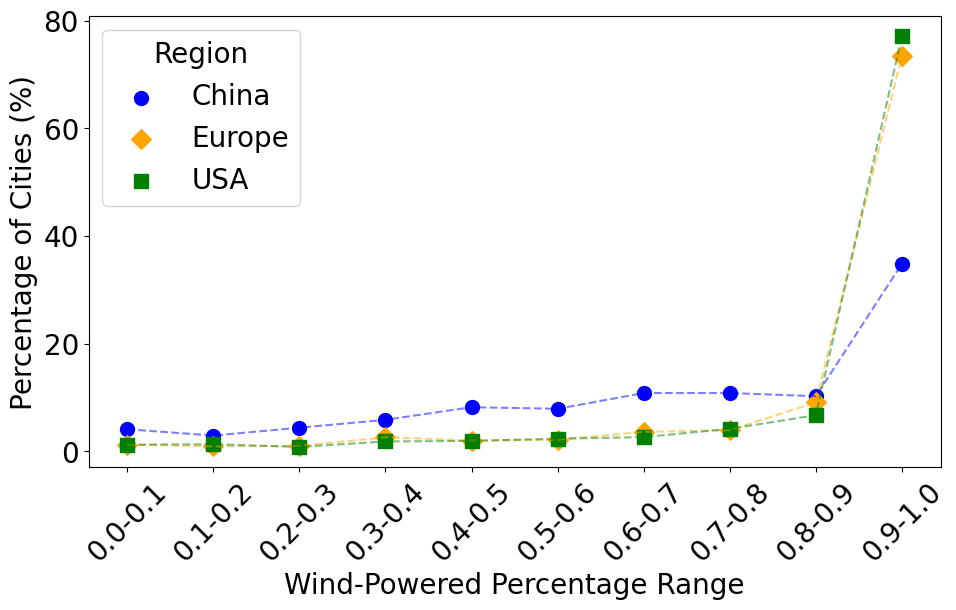

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
china_df = pd.read_csv('China_charging_stations_with_updated_min_max_values.csv')
eu_df = pd.read_csv('EU_charging_stations_with_updated_min_max_values.csv')
usa_df = pd.read_csv('USA_charging_stations_with_updated_min_max_values.csv')

# Standardize column names across datasets
china_df = china_df.rename(columns={'city': 'City', 'power_density': 'Power_Density'})
eu_df = eu_df.rename(columns={'NUTS_NAME_right': 'City', 'power_density': 'Power_Density'})
usa_df = usa_df.rename(columns={'COUNTYNS': 'City1', 'Power_Density': 'Power_Density'})

# Define the threshold for wind-powered generation
threshold = 16.5375

# Initialize list to store results
results = []

# Process China data
china_df['Region'] = 'China'
china_grouped = china_df.groupby('City').agg(
    total_stations=('City', 'size'),
    wind_powered_stations=('Power_Density', lambda x: (x > threshold).sum())
).reset_index()
china_grouped['Region'] = 'China'
results.append(china_grouped)

# Process EU data
eu_df['Region'] = 'Europe'  # Rename EU to Europe
eu_grouped = eu_df.groupby('City').agg(
    total_stations=('City', 'size'),
    wind_powered_stations=('Power_Density', lambda x: (x > threshold).sum())
).reset_index()
eu_grouped['Region'] = 'Europe'  # Rename EU to Europe
results.append(eu_grouped)

# Process USA data
usa_df['Region'] = 'USA'
usa_grouped = usa_df.groupby('City1').agg(
    total_stations=('City1', 'size'),
    wind_powered_stations=('Power_Density', lambda x: (x > threshold).sum())
).reset_index()
usa_grouped['Region'] = 'USA'
results.append(usa_grouped)

# Combine all results
result_df = pd.concat(results, ignore_index=True)

# Calculate the percentage of wind-powered charging stations
result_df['wind_powered_percentage'] = result_df['wind_powered_stations'] / result_df['total_stations']

# Define bins for percentage ranges
bins = np.arange(0, 1.1, 0.1)
labels = [f'{i:.1f}-{j:.1f}' for i, j in zip(bins[:-1], bins[1:])]

# Assign each city's percentage to a bin
result_df['percentage_bin'] = pd.cut(result_df['wind_powered_percentage'], bins=bins, labels=labels, include_lowest=True)

# Count the number of cities in each bin by region
region_bin_counts = result_df.groupby(['Region', 'percentage_bin']).size().unstack(fill_value=0)

# Calculate the percentage of cities within each bin (by region)
region_bin_percentages = region_bin_counts.div(region_bin_counts.sum(axis=1), axis=0) * 100

# Define colors and markers for each region
colors = {'China': 'blue', 'USA': 'green', 'Europe': 'orange'}  # Europe instead of EU
markers = {'China': 'o', 'USA': 's', 'Europe': 'D'}  # Europe instead of EU

# Plot scatter with connecting lines
plt.figure(figsize=(10, 6.5))

for region in region_bin_percentages.index:
    # Plot scatter points
    plt.scatter(
        region_bin_percentages.columns,
        region_bin_percentages.loc[region],
        label=region,
        color=colors[region],
        marker=markers[region],
        s=100  # Point size
    )
    # Plot dashed connecting lines
    plt.plot(
        region_bin_percentages.columns,
        region_bin_percentages.loc[region],
        color=colors[region],
        linestyle='--',
        alpha=0.5
    )

# Set title and axis labels
# plt.title('Distribution of Wind-Powered Charging Station Percentage by Region', fontsize=16)
plt.xlabel('Wind-Powered Percentage Range', fontsize=20)
plt.ylabel('Percentage of Cities (%)', fontsize=20)

# Set tick label font sizes
plt.xticks(fontsize=20, rotation=45, ha='center')
plt.yticks(fontsize=20)

# Set legend font size
plt.legend(title='Region', title_fontsize=20, fontsize=20)

# Adjust layout for better fit
plt.tight_layout()

# Display the plot
plt.show()


# Fig 2d

In [ ]:
import pandas as pd
import geopandas as gpd

# Define file paths
csv_file = 'clustered_results_adjusted.csv'
china_city_geojson = '中国_市.geojson'
us_counties_geojson = 'counties.geojson'
eu_nuts_geojson = 'NUTS_RG_20M_2021_4326.geojson'

# Read the CSV file
df_csv = pd.read_csv(csv_file)

# Read GeoJSON files using pyogrio engine for better performance
gdf_china = gpd.read_file(china_city_geojson, engine='pyogrio')
gdf_us = gpd.read_file(us_counties_geojson, engine='pyogrio')
gdf_eu = gpd.read_file(eu_nuts_geojson, engine='pyogrio')

# Ensure the China GeoDataFrame uses EPSG:4326 coordinate system
if gdf_china.crs.to_epsg() != 4326:
    gdf_china = gdf_china.to_crs(epsg=4326)
    print("Converted 中国_市.geojson to EPSG:4326")

# Preprocess the U.S. county identifier in the CSV to match the COUNTYNF format in us_counties_geojson
def format_county_ns(county_ns):
    return str(county_ns).zfill(8)  # Zero-pad to 8 digits

# Apply formatting to U.S. cities in the CSV where Area is 'USA'
df_csv['COUNTYNS'] = df_csv[df_csv['Area'] == 'USA']['City'].apply(format_county_ns)

# Merge data with spatial data

# China: Merge on city name ('name' in GeoJSON, 'City' in CSV)
gdf_china_merged = gdf_china.merge(df_csv[df_csv['Area'] == 'China'], left_on='name', right_on='City', how='left')
print(f"Number of Chinese cities with new data: {gdf_china_merged[['City']].notna().sum().values[0]}")

# USA: Merge on formatted county identifier (COUNTYNS)
gdf_us_merged = gdf_us.merge(df_csv[df_csv['Area'] == 'USA'], left_on='COUNTYNS', right_on='COUNTYNS', how='left')
print(f"Number of U.S. counties with new data: {gdf_us_merged[['City']].notna().sum().values[0]}")

# EU: Merge on region name (NUTS_NAME in GeoJSON, 'City' in CSV)
gdf_eu_merged = gdf_eu.merge(df_csv[df_csv['Area'] == 'EU'], left_on='NUTS_NAME', right_on='City', how='left')
print(f"Number of EU regions with new data: {gdf_eu_merged[['City']].notna().sum().values[0]}")

# Save the merged GeoDataFrames to new GeoJSON files
output_china = 'china_cities_with_dataHighLow.geojson'
output_us = 'us_counties_with_dataHighLow.geojson'
output_eu = 'eu_nuts_with_dataHighLow.geojson'

gdf_china_merged.to_file(output_china, driver='GeoJSON')
gdf_us_merged.to_file(output_us, driver='GeoJSON')
gdf_eu_merged.to_file(output_eu, driver='GeoJSON')

print(f"Saved new GeoJSON files to: {output_china}, {output_us}, and {output_eu}")

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

# Define color mapping for cluster types
color_map = {
    'High-High': '#d7191c',  # Red tone (original RGB: 215,25,28)
    'High-Low': '#fdaa61',   # Orange tone (original RGB: 253,174,97)
    'Low-High': '#abd9e9',   # Cyan-blue tone (original RGB: 171,217,233)
    'Low-Low': '#2c7bb6',    # Dark blue tone (original RGB: 44,123,182)
}

# Define mapping for cluster category labels
cluster_labels_mapping = {
    ('High', 'High'): 'High-High',
    ('High', 'Low'): 'High-Low',
    ('Low', 'High'): 'Low-High',
    ('Low', 'Low'): 'Low-Low',
}

# Function: Apply color encoding to GeoDataFrame based on energy and coverage labels
def apply_colors(gdf, energy_type):
    def get_color(energy_label, coverage_label):
        if pd.isna(energy_label) or pd.isna(coverage_label):
            return '#FFFFFF'  # Use white (or other default) for missing values
        try:
            label = cluster_labels_mapping[(energy_label, coverage_label)]
            return color_map[label]
        except KeyError:
            return '#FFFFFF'  # Use default color if label is not found
    
    if energy_type == 'Wind':
        gdf['color'] = gdf.apply(lambda row: get_color(row['Avg_Wind_Energy_label'], row['avg_wind_matching_level_label']), axis=1)
    elif energy_type == 'Solar':
        gdf['color'] = gdf.apply(lambda row: get_color(row['Avg_PV_Energy_label'], row['avg_PV_matching_level_label']), axis=1)
    return gdf

# Function: Plot regional map with legend and styling
def plot_region(gdf, title, filename, region_bounds=None):
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    
    if not gdf.empty:
        # Dissolve GeoDataFrame by color to remove internal boundaries and fix geometry issues
        dissolved_gdf = gdf.dissolve(by=['color']).buffer(0)  # buffer(0) helps fix invalid geometries
        
        # Plot outer boundary with light gray fill and solid black edge
        dissolved_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.6, zorder=4)
        
        # Plot colored regions (excluding missing data, which are white)
        gdf[gdf['color'] != '#FFFFFF'].plot(ax=ax, color=gdf[gdf['color'] != '#FFFFFF']['color'], alpha=0.7, zorder=10)

        ax.set_title(title, fontsize=16)
        
        # Apply geographic bounds if provided (e.g., for continental US)
        if region_bounds is not None:
            ax.set_xlim(region_bounds[0], region_bounds[1])
            ax.set_ylim(region_bounds[2], region_bounds[3])

        # Remove axis ticks and labels
        ax.set_axis_off()

        # Add legend
        legend_elements = [
            Patch(facecolor=color_map['High-High'], label='High-High'),
            Patch(facecolor=color_map['High-Low'], label='High-Low'),
            Patch(facecolor=color_map['Low-High'], label='Low-High'),
            Patch(facecolor=color_map['Low-Low'], label='Low-Low')
        ]
        ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(1.1, 0.1), fontsize=12, frameon=True)  # Add border to legend

    # Save figure with high resolution, tight layout, and transparent background
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.1, transparent=True)
    plt.close(fig)

# Read GeoJSON files
gdf_china = gpd.read_file('china_cities_with_dataHighLow.geojson', engine='pyogrio')
gdf_us = gpd.read_file('us_counties_with_dataHighLow.geojson', engine='pyogrio')
gdf_eu = gpd.read_file('eu_nuts_with_dataHighLow.geojson', engine='pyogrio')

# Apply color encoding for wind energy potential
gdf_china_wind = apply_colors(gdf_china.copy(), 'Wind')
gdf_us_wind = apply_colors(gdf_us[~gdf_us['STATEFP'].isin(['02', '15'])].copy(), 'Wind')  # Exclude Alaska and Hawaii
gdf_eu_wind = apply_colors(gdf_eu[gdf_eu['CNTR_CODE'] != 'TR'].copy(), 'Wind')  # Exclude Turkey

# Apply color encoding for solar (PV) energy potential
gdf_china_solar = apply_colors(gdf_china.copy(), 'Solar')
gdf_us_solar = apply_colors(gdf_us[~gdf_us['STATEFP'].isin(['02', '15'])].copy(), 'Solar')  # Exclude Alaska and Hawaii
gdf_eu_solar = apply_colors(gdf_eu[gdf_eu['CNTR_CODE'] != 'TR'].copy(), 'Solar')  # Exclude Turkey

# Generate and save wind energy potential maps
plot_region(gdf_china_wind, 'China Wind Potential', 'china_wind_map.png')
plot_region(gdf_us_wind, 'USA Wind Potential', 'us_wind_map.png', region_bounds=[-130, -65, 24, 50])  # Continental USA bounds
plot_region(gdf_eu_wind, 'EU Wind Potential', 'eu_wind_map.png')

# Generate and save solar energy potential maps
plot_region(gdf_china_solar, 'China Solar Potential', 'china_solar_map.png')
plot_region(gdf_us_solar, 'USA Solar Potential', 'us_solar_map.png', region_bounds=[-130, -65, 24, 50])  # Continental USA bounds
plot_region(gdf_eu_solar, 'EU Solar Potential', 'eu_solar_map.png')